# Exploring Air Traffic Data of Germany - v01

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from geopy.distance import geodesic 

from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 1000

## Import data

In [2]:
path = '../data/'

In [3]:
df_raw = pd.read_csv(path + 'flight_data_de.csv')

## Explore data: some descriptive stats

### General

In [4]:
df = df_raw.copy() # .iloc[:, 1:]

In [5]:
df.head(20)

,route,fr_country,fr_airport,to_country,to_airport,month,flight_d,seat_d,passenger_d
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0
5,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0
6,DE_EDDB_EL_LGAV,DE,EDDB,EL,LGAV,2019-11-01,28.0,5122.0,4159.0
7,DE_EDDB_EL_LGTS,DE,EDDB,EL,LGTS,2019-11-01,27.0,4968.0,3946.0
8,DE_EDDB_ES_GCTS,DE,EDDB,ES,GCTS,2019-11-01,23.0,4308.0,3921.0
9,DE_EDDB_ES_LEBL,DE,EDDB,ES,LEBL,2019-11-01,96.0,17222.0,15668.0


In [6]:
col_names = {
    'route': 'flight',
    'flight_d': 'num_flights',
    'seat_d': 'seats',
    'passenger_d': 'passengers',
    'month': 'date'
}

df.rename(columns=col_names, inplace=True)

In [7]:
df.describe()

,num_flights,seats,passengers
count,161011.000000,161011.000000,161011.000000
mean,84.296725,12885.603592,9569.505164
std,100.450240,15255.707276,11410.283864
min,0.000000,0.000000,0.000000
25%,22.000000,4346.000000,3214.000000
50%,52.000000,8105.000000,5923.000000
75%,112.000000,15104.500000,11045.000000
max,824.000000,148928.000000,116241.000000


In [8]:
cols = ['util_rate', 'num_flights', 'seats', 'passengers', 'flight']

### What to analyze

<b>KPIs:</b>

- [ ] number of flights (sum, mean) // number of passengers
- [x] utilization (passengers /seats)

<b>Along the following dimensions:</b>
- [ ] per connection
- [ ] per airport
- [ ] outgoing (from DE)
- [ ] incoming (to DE)




### Analysis

#### Calculate utilization rate `util_rate` (passengers / seats)

In [9]:
df = df.assign(util_rate = df['passengers'] / df['seats'])

In [10]:
df['util_rate'].describe()

count    161008.000000
mean          0.752652
std           0.140155
min           0.000000
25%           0.659578
50%           0.762497
75%           0.865373
max           1.000000
Name: util_rate, dtype: float64

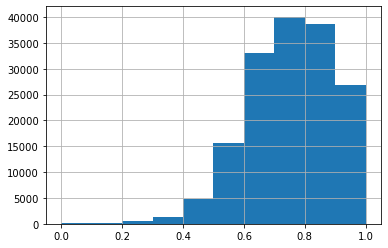

In [11]:
df['util_rate'].hist();

In [12]:
df.head()

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,0.860147
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,0.218750


In [13]:
df.isna().sum()

flight           0
fr_country       0
fr_airport       0
to_country     215
to_airport       0
date             0
num_flights      0
seats            0
passengers       0
util_rate        3
dtype: int64

replace NaN values in `util_rate`

In [14]:
df['util_rate'] = df['util_rate'].fillna(0)

#### Calculate `category`: international or national flight

In [15]:
df = df.assign(domestic=(df['fr_country'] == df['to_country']).astype(int)) 

#### Plot distributions

In [16]:
cols

['util_rate', 'num_flights', 'seats', 'passengers', 'flight']

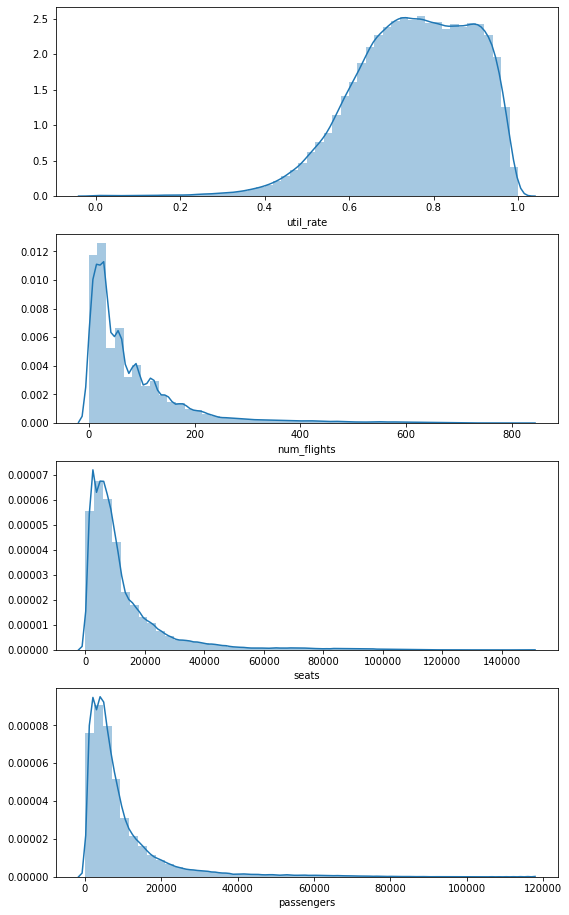

In [17]:
fig, axes = plt.subplots(4, 1, figsize=(9,16))


i = 0
for ax in axes.flatten():
    sns.distplot(df[cols[i]], ax=ax);
    i+=1

# fig.show()

In [18]:
cols = ['date', 'flight', 'util_rate', 'num_flights', 'seats', 'passengers']

# df[cols]

#### Aggregate by month: `df_month`

In [19]:
df.head()

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate,domestic
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685,0
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622,0
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093,0
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,0.860147,0
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,0.218750,1


In [20]:
df_month = df[cols].groupby('date').agg({
    'util_rate': 'mean',
    'num_flights': 'sum',
    'seats': 'sum',
    'passengers': 'sum',
})

In [21]:
df_month

,util_rate,num_flights,seats,passengers
date,,,,
2002-01-01,0.581628,0.0,6384116.0,3682261.0
2002-02-01,0.688225,0.0,6084543.0,3995969.0
2002-03-01,0.732179,0.0,6981751.0,4915199.0
2002-04-01,0.657980,0.0,7043975.0,4667819.0
2002-05-01,0.682321,0.0,7411849.0,5072795.0
2002-06-01,0.710319,0.0,7438252.0,5207200.0
2002-07-01,0.737086,0.0,7796048.0,5576948.0
2002-08-01,0.708127,0.0,7753732.0,5413837.0
2002-09-01,0.752905,0.0,7746976.0,5732242.0


In [22]:
df_month = df_month.reset_index()
df_month['date'] = pd.to_datetime(df_month['date'], format='%Y-%m-%d')

In [23]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 5 columns):
date           215 non-null datetime64[ns]
util_rate      215 non-null float64
num_flights    215 non-null float64
seats          215 non-null float64
passengers     215 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 8.5 KB


#### Deep-Dive: 2017-2018

In [24]:
df_month['date'][0].year

2002

In [25]:
# df_grouped[df_grouped['date'].between(pd.to_datetime('2018-01-01', format='%Y-%m-%d'),pd.to_datetime('2017-01-01', format='%Y-%m-%d'))]

df_month[df_month['date'].dt.year.between(2017, 2018)]



,date,util_rate,num_flights,seats,passengers
180,2017-01-01,0.692323,60381.0,9700544.0,6673956.0
181,2017-02-01,0.762234,58260.0,9301441.0,6792424.0
182,2017-03-01,0.786033,67166.0,10775790.0,8099584.0
183,2017-04-01,0.818040,69688.0,11400427.0,9064774.0
184,2017-05-01,0.795982,75848.0,12382247.0,9603220.0
185,2017-06-01,0.819852,74145.0,12176509.0,9735364.0
186,2017-07-01,0.869221,76150.0,12565931.0,10615767.0
187,2017-08-01,0.832813,74301.0,12314990.0,9989107.0
188,2017-09-01,0.827603,76187.0,12561677.0,10192221.0
189,2017-10-01,0.802588,75783.0,12520227.0,9834130.0


/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


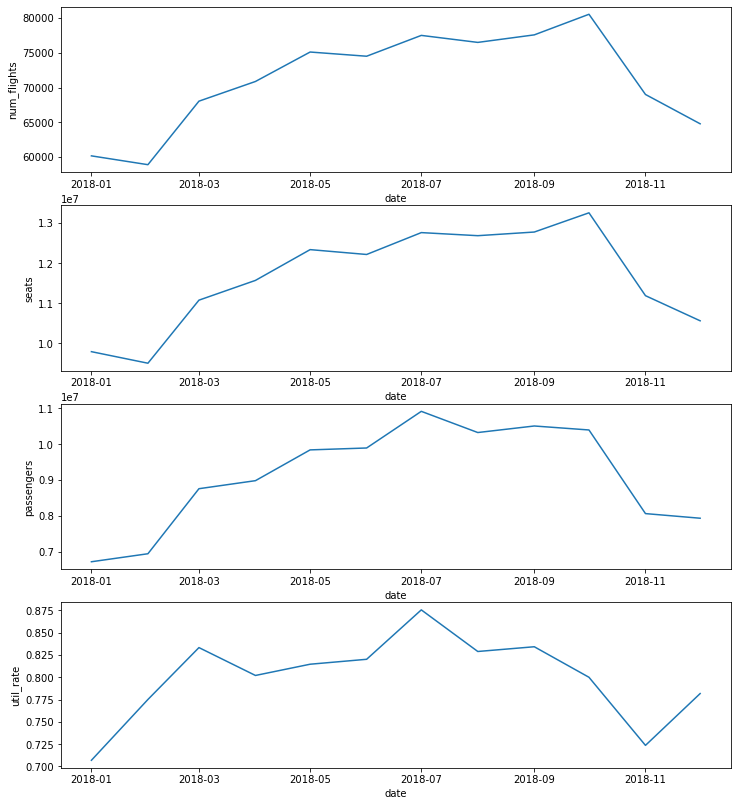

In [26]:
fig, axes = plt.subplots(4, 1, figsize=(12,14))

start_year = 2018
end_year = 2018

sns.lineplot(data=df_month[df_month['date'].dt.year.between(start_year, end_year)], x='date', y='num_flights', ax=axes[0]);
sns.lineplot(data=df_month[df_month['date'].dt.year.between(start_year, end_year)], x='date', y='seats', ax=axes[1]);
sns.lineplot(data=df_month[df_month['date'].dt.year.between(start_year, end_year)], x='date', y='passengers', ax=axes[2]);
sns.lineplot(data=df_month[df_month['date'].dt.year.between(start_year, end_year)], x='date', y='util_rate', ax=axes[3]);



# df[['util_rate']].plot(ax = axes[0,1])

# i = 0
# for ax in axes.flatten():
#     sns.lineplot(df_grouped, 
#                  # x='date',
#                  y=cols[i],
#                  ax=ax);
#     i+=1

#### Descriptive Statistics by Flight Connection

In [27]:
df.head(3)

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate,domestic
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685,0
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622,0
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093,0


In [28]:
cols

['date', 'flight', 'util_rate', 'num_flights', 'seats', 'passengers']

In [29]:
df_flight = df[cols].groupby('flight').agg({
    'util_rate': 'mean',
    'num_flights': 'sum',
    'seats': 'sum',
    'passengers': 'sum',
})

In [30]:
df_flight.sort_values(by='num_flights', ascending=False)

,util_rate,num_flights,seats,passengers
flight,,,,
DE_EDDM_DE_EDDT,0.739834,124358.0,20518607.0,15192527.0
DE_EDDT_DE_EDDM,0.733170,124194.0,20534119.0,15078385.0
DE_EDDM_DE_EDDH,0.752200,119891.0,19728003.0,14856853.0
DE_EDDH_DE_EDDM,0.750186,119268.0,19674811.0,14778889.0
DE_EDDL_DE_EDDM,0.699647,119087.0,19140303.0,13383843.0
...,...,...,...,...
DE_EDDI_DE_EDDN,0.217366,0.0,32813.0,16888.0
DE_EDDI_CH_LSGG,0.384074,0.0,30184.0,11626.0
DE_EDDV_BG_LBBG,0.787086,0.0,27436.0,22991.0


In [31]:
df.to_airport.unique()

array(['EBBR', 'LBSF', 'LSGG', 'LSZM', 'EDDK', 'EKCH', 'LGAV', 'LGTS',
       'GCTS', 'LEBL', 'LEMD', 'LEMG', 'LEPA', 'LFMN', 'LFPG', 'LHBP',
       'EIDW', 'LLBG', 'LICC', 'LIMC', 'LIME', 'LIPE', 'LIPH', 'LIRA',
       'LIRN', 'LIRP', 'EVRA', 'EHAM', 'ENGM', 'LPPT', 'LROP', 'ULLI',
       'UUEE', 'ESSA', 'LTAI', 'LTFJ', 'UKKK', 'EGCC', 'EGGD', 'EGGW',
       'EGKK', 'EGPF', 'EGPH', 'EGSS', 'LSZH', 'EDDF', 'EDDL', 'EDDM',
       'EDDS', 'HEGN', 'OMAA', 'OMDB', 'LATI', 'SAEZ', 'LOWG', 'LOWI',
       'LOWL', 'LOWS', 'LOWW', 'SBGL', 'SBGR', 'UMMS', 'CYUL', 'CYVR',
       'CYYC', 'CYYZ', 'ZBAA', 'ZSNJ', 'ZSPD', 'SKBO', 'LCLK', 'LKPR',
       'EDDC', 'EDDG', 'EDDH', 'EDDN', 'EDDP', 'EDDT', 'EDDV', 'EDDW',
       'EDNY', 'EKBI', 'MDPC', 'DAAG', 'EETN', 'HECA', 'HEMA', 'LGIR',
       'LGKO', 'LGKR', 'LGRP', 'GCFV', 'GCLP', 'GCRR', 'LEAL', 'LEBB',
       'LEIB', 'LEVC', 'LEZL', 'HAAB', 'EFHK', 'LFBO', 'LFLL', 'LFML',
       'VHHH', 'LDDU', 'LDSP', 'LDZA', 'VABB', 'VIDP', 'VOBL', 'VOMM',
      

#### Get geocode information

In [32]:
df_geo = pd.read_csv(path + 'world_airports.csv')

In [33]:
df_geo.head(500)

,airport_id,name,city,country,iata,icao,latitude,longitude,altitude,timezone
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4


In [34]:
icao1 = 'AYGA'
df_geo.loc[df_geo['icao'] == icao1, 'latitude'].iloc[0]

-6.0816898345900015

In [35]:
df_geo.loc[df_geo['icao'] == icao1, 'latitude'].iloc[0]

-6.0816898345900015

In [36]:
def get_distance(icao1, icao2):

    try:
        coord1 = df_geo.loc[df_geo['icao'] == icao1, 'latitude'].iloc[0], df_geo.loc[df_geo['icao'] == icao1, 'longitude'].iloc[0]
        coord2 = df_geo.loc[df_geo['icao'] == icao2, 'latitude'].iloc[0], df_geo.loc[df_geo['icao'] == icao2, 'longitude'].iloc[0]
        dist = geodesic(coord1, coord2).km

    except:
        dist = 0
        print(icao1 + icao2)

    return dist


In [37]:
get_distance('AYGA', 'AYWK')

335.8868612597865

In [38]:
df_test = df.head(20).copy()

In [39]:
df_test

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate,domestic
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685,0
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622,0
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093,0
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,0.860147,0
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,0.218750,1
5,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0,0.835768,0
6,DE_EDDB_EL_LGAV,DE,EDDB,EL,LGAV,2019-11-01,28.0,5122.0,4159.0,0.811988,0
7,DE_EDDB_EL_LGTS,DE,EDDB,EL,LGTS,2019-11-01,27.0,4968.0,3946.0,0.794283,0
8,DE_EDDB_ES_GCTS,DE,EDDB,ES,GCTS,2019-11-01,23.0,4308.0,3921.0,0.910167,0
9,DE_EDDB_ES_LEBL,DE,EDDB,ES,LEBL,2019-11-01,96.0,17222.0,15668.0,0.909767,0


In [40]:
# df_test['distance'] = df_test.apply(lambda x: get_distance(x['fr_airport'], x['to_airport']), axis=1)

In [41]:
# df['distance'] = df.apply(lambda x: get_distance(x['fr_airport'], x['to_airport']), axis=1)

In [42]:
missing_airports = ['LSZM', 'LYPR', 'DTNZ', 'FAJS', 'HECA', 'GMAD']

In [43]:
df_geo[df_geo['icao'].isin(missing_airports)]['airport_id'].count()

2

There are no entries in `df_geo` for the airports listed in `missing_airports`

Check how many flights are affected by the missing airports:

In [44]:
len(df[df['to_airport'].isin(missing_airports)])

2233

In [45]:
len(df)

161011

In [46]:
len(df[df['to_airport'].isin(missing_airports)]) / len(df)

0.013868617672084516

Around 1% of flights are affected by the missing airports, so we will drop those rows for now...

<b>TODO: There are more airports with missing lat-long data than only those listed above...</b>

In [47]:
df = df[~df['to_airport'].isin(missing_airports)]

In [48]:
df_geo[df_geo['icao'].eq('EDDK')]

,airport_id,name,city,country,iata,icao,latitude,longitude,altitude,timezone
340,344,Cologne Bonn Airport,Cologne,Germany,CGN,EDDK,50.865898,7.14274,302,1


Get unique list of connections to pass into `get_distance` function

In [49]:
df.head(3)

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate,domestic
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685,0
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622,0
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093,0


Create a dataframe with unique flight connections to calculate distances, otherwise it takes too long...

In [50]:
df_unique_conn = df.drop_duplicates(subset='flight').copy()

In [51]:
df_unique_conn.shape

(1607, 11)

In [52]:
df_unique_conn['distance'] = df_unique_conn.apply(lambda x: get_distance(x['fr_airport'], x['to_airport']), axis=1)

EDDFSABA
EDDFCUUP
EDDFZSSA
EDDFRJNN
EDDFGMMC
EDDMZSSA
EDDPOR99
EDDPUAFF
EDDPOT99
EDDPK999
EDJAEN00
ED00EDDB
ED00EDDT
EDDBED99
ETNLLECP
EDDBLECP
EDDBENOS
EDDCLECP
EDDELECP
EDDFLECP
EDDFENOS
EDDGLECP
EDDHLECP
EDDHENOS
EDDKLECP
EDDLLECP
EDDMLECP
EDDMLIVT
EDDMENOS
EDDNLECP
EDDNLPFU
EDDPLECP
EDDRLECP
EDDSLECP
EDDTLECP
EDDVLECP
EDDWLECP
EDHLES99
EDLPLECP
EDLWLECP
EDSBLECP
EDNYLECP
EDFHES99
EDLVES99
EDTKLECP
EDHLED99
EDFHESMM


In [53]:
df_unique_conn.head()

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate,domestic,distance
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685,0,646.455762
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622,0,1306.358290
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093,0,869.238264
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,0.218750,1,472.646160
5,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0,0.835768,0,364.838246


Merge distances back to df

In [54]:
df_with_dist = df.merge(df_unique_conn[['flight', 'distance']], how='left', on='flight')

In [55]:
df_with_dist.head(50)

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate,domestic,distance
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685,0,646.455762
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622,0,1306.358290
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093,0,869.238264
3,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,0.218750,1,472.646160
4,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0,0.835768,0,364.838246
5,DE_EDDB_EL_LGAV,DE,EDDB,EL,LGAV,2019-11-01,28.0,5122.0,4159.0,0.811988,0,1798.003015
6,DE_EDDB_EL_LGTS,DE,EDDB,EL,LGTS,2019-11-01,27.0,4968.0,3946.0,0.794283,0,1502.120328
7,DE_EDDB_ES_GCTS,DE,EDDB,ES,GCTS,2019-11-01,23.0,4308.0,3921.0,0.910167,0,3672.588688
8,DE_EDDB_ES_LEBL,DE,EDDB,ES,LEBL,2019-11-01,96.0,17222.0,15668.0,0.909767,0,1506.066516
9,DE_EDDB_ES_LEMD,DE,EDDB,ES,LEMD,2019-11-01,32.0,5516.0,4978.0,0.902466,0,1855.603981


In [56]:
df_with_dist.describe()

,num_flights,seats,passengers,util_rate,domestic,distance
count,158778.000000,158778.000000,158778.000000,158778.000000,158778.000000,158778.000000
mean,84.554611,12931.537915,9599.984614,0.752515,0.156823,2020.927967
std,100.989794,15341.616925,11470.738178,0.140161,0.363635,2288.772730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,4329.000000,3205.000000,0.659512,0.000000,563.372181
50%,52.000000,8103.000000,5929.000000,0.762144,0.000000,1151.863766
75%,113.000000,15133.750000,11060.750000,0.865208,0.000000,2213.256225
max,824.000000,148928.000000,116241.000000,1.000000,1.000000,11479.139700


Note that there are flights with distance = 0. In these cases, the `to_airport` could not be found in `df_geo` and therefore the distance could not be calculated.

Drop rows with distance = 0

In [57]:
df_with_dist = df_with_dist[df_with_dist['distance'] > 0]

In [58]:
df_with_dist.to_csv(path + 'flight_data_de_with_distances.csv')

#### testing random stuff...

In [59]:
df_test = df.copy()

In [60]:
df_test['lat'] = 45
df_test['long'] = 8

In [61]:
df_test.head()

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate,domestic,lat,long
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685,0,45,8
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622,0,45,8
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093,0,45,8
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,0.218750,1,45,8
5,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0,0.835768,0,45,8


In [62]:
for index, row in df_test[['lat', 'long']].head(10).iterrows():
    coordinate = row['lat'], row['long']
    print(coordinate)
    print(type(coordinate))
    print()

(45, 8)
<class 'tuple'>

(45, 8)
<class 'tuple'>

(45, 8)
<class 'tuple'>

(45, 8)
<class 'tuple'>

(45, 8)
<class 'tuple'>

(45, 8)
<class 'tuple'>

(45, 8)
<class 'tuple'>

(45, 8)
<class 'tuple'>

(45, 8)
<class 'tuple'>

(45, 8)
<class 'tuple'>



#### Create df with distances

In [63]:
df_dist = pd.read_csv(path + 'flight_data_de_with_distances.csv')

In [64]:
df_dist = df_dist.iloc[:, 1:]

In [65]:
df_dist.head()

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate,domestic,distance
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685,0,646.455762
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622,0,1306.358290
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093,0,869.238264
3,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,0.218750,1,472.646160
4,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0,0.835768,0,364.838246


In [66]:
df_dist_2 = df_dist.drop_duplicates(subset='flight')

In [67]:
df_dist_2.head()

,flight,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,util_rate,domestic,distance
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,0.894685,0,646.455762
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,0.896622,0,1306.358290
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,0.834093,0,869.238264
3,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,0.218750,1,472.646160
4,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0,0.835768,0,364.838246


In [68]:
df_dist_3 = df_dist_2[['flight', 'distance']].copy()

In [69]:
df_dist_3.to_csv(path + 'flight_data_de_with_distances_v2.csv')

In [70]:
df_dist_3.head()

,flight,distance
0,DE_EDDB_BE_EBBR,646.455762
1,DE_EDDB_BG_LBSF,1306.358290
2,DE_EDDB_CH_LSGG,869.238264
3,DE_EDDB_DE_EDDK,472.646160
4,DE_EDDB_DK_EKCH,364.838246
